<a href="https://colab.research.google.com/github/EvgenyEsin/Machine_learning/blob/main/Machine_learning_sem_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ к семинару 9 Ансамбли на практике


Ваша задача — реализовать алгоритм случайного леса для задачи классификации и применить его к набору данных.

Шаги выполнения задания:

1. Импортируйте необходимые библиотеки: numpy, pandas, sklearn.

2. Загрузите набор данных для задачи классификации. Вы можете использовать любой доступный набор данных или выбрать один из популярных, таких как Iris, Wine или MNIST.

3. Проведите предварительную обработку данных, включая масштабирование и разделение на обучающую и тестовую выборки.

4. Реализуйте алгоритм случайного леса. Включите в него функции для построения деревьев решений, выбора случайных признаков и голосования для принятия решений.

5. Обучите вашу модель случайного леса на обучающей выборке.

6. Оцените производительность модели на тестовой выборке, используя метрики классификации, такие как точность, полнота и F1-мера.

7. Проведите сравнение результатов вашей модели со стандартной реализацией случайного леса из библиотеки scikit-learn.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

## Модель предсказания инфартка миокарда

## Описание Датасета
- minf – целевая переменная (инфаркт миокарда). Здесь и в других столбцах в качестве наличия признака - ‘1’, отсутствие – ‘0’.
- man/female мужчины - ‘1’, женщины -  ‘0’.
- Smoking/Alcoholism - курение и алкоголизм
- Fatness - ожирение
- Diabetes - повышенный уровень глюкозы в крови
- Hyperlipidemia - гиперлипидемия
- Physical Inactivity - низкая физическая активность
- Arterial Hypertension - артериальная гипертензия

## Чтение датасета

In [47]:
df = pd.read_excel('IM_dataset_1.xls')
df.head()

,minf,age,man/female,SmokingAlcoholism,Fatness,Diabetes,Hyperlipidemia,PhysicalInactivity,ArterialHypertension
0,1,43,1,1,0,0,1,0,1
1,1,44,1,1,0,0,1,0,1
2,1,45,1,1,0,0,1,0,1
3,1,46,1,1,0,0,1,0,1
4,1,47,1,1,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4073 entries, 0 to 4072
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   minf                  4073 non-null   int64
 1   age                   4073 non-null   int64
 2   man/female            4073 non-null   int64
 3   SmokingAlcoholism     4073 non-null   int64
 4   Fatness               4073 non-null   int64
 5   Diabetes              4073 non-null   int64
 6   Hyperlipidemia        4073 non-null   int64
 7   PhysicalInactivity    4073 non-null   int64
 8   ArterialHypertension  4073 non-null   int64
dtypes: int64(9)
memory usage: 286.5 KB


Пропущенных значений нет.

In [5]:
df.describe()

,minf,age,man/female,SmokingAlcoholism,Fatness,Diabetes,Hyperlipidemia,PhysicalInactivity,ArterialHypertension
count,4073.000000,4073.000000,4073.000000,4073.000000,4073.000000,4073.000000,4073.000000,4073.000000,4073.000000
mean,0.040511,63.619200,0.407808,0.224159,0.269089,0.178001,0.157623,0.158605,0.753499
std,0.197178,13.980431,0.491487,0.417079,0.443541,0.382561,0.364432,0.365353,0.431027
min,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,73.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,97.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Предобработка данных

### Проверим датасет на дубликаты

In [6]:
df.duplicated().sum()

2519

дубликатов много, так как в датасете все признаки бинарные

### Посмотрим на распределение датасета по возрасту

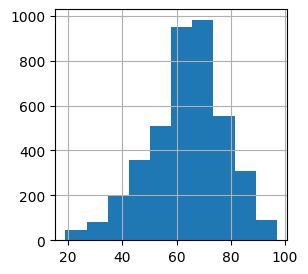

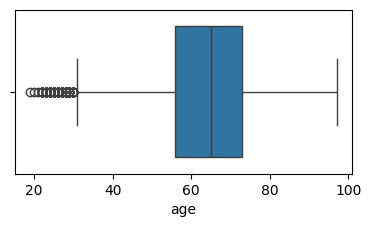

In [9]:
df['age'].hist(figsize=(3, 3));

plt.figure(figsize = (20,20))
for i,col in enumerate(['age']):
    plt.subplot(8,4,i+1)
    sns.boxplot(x = col, data = df)
plt.show()

Есть выброс в столбце 'age', но для этого датасета, считаю это нормальным

### Посмотрим на распределение больных инфарктом по возрасту

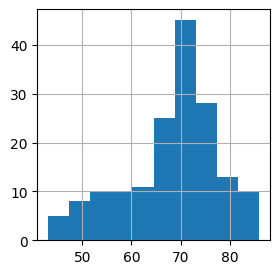

In [10]:
df[(df['minf'] == 1)]['age'].hist(figsize=(3, 3));

### Посмотрим соотношение целевого признака

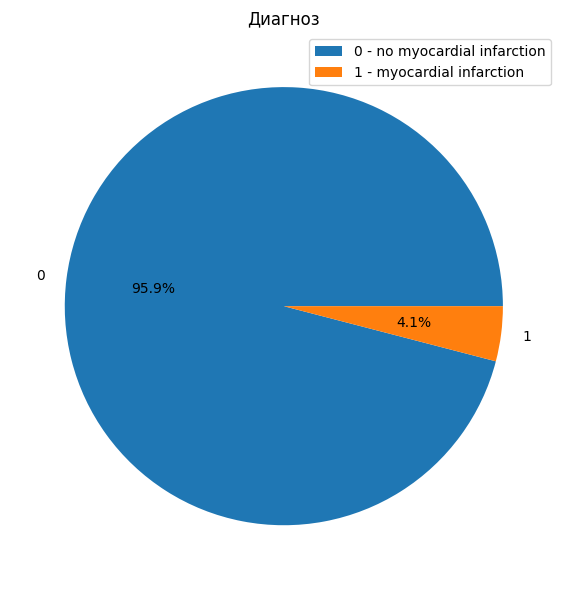

In [11]:
df.minf.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,6))
plt.legend(['0 - no myocardial infarction', '1 - myocardial infarction'])
plt.title('Диагноз')
plt.tight_layout()
plt.axis('off');

целевой признак не сбалансирован, большинство здоровы

Для балансировки данных используем метод upsampling data

In [48]:
# Найдем соотношение количества строк с 0 и 1
n = len(df.loc[df['minf']==0])//len(df.loc[df['minf']==1])
n

23

Создадим новый датасет методом upsampling:

возьмём все данные с классом 1

продублируем их n раз

присоединим к данным класса 0 продублированный класс 1 и перемешаем

In [49]:
df_1 = df.loc[df['minf']==1]
df_1 = df_1.loc[df_1.index.repeat(n)]
df = pd.concat([df.loc[df['minf']==0], df_1]).sample(frac=1)

### Посмотрим соотношение целевого признака после преобразования

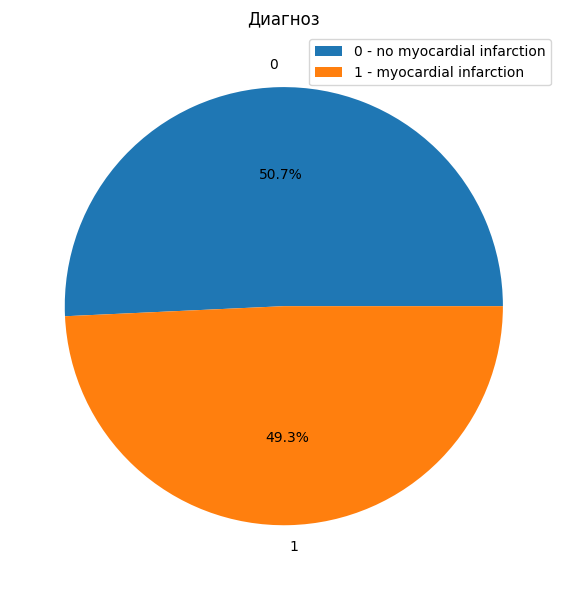

In [50]:
df.minf.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,6))
plt.legend(['0 - no myocardial infarction', '1 - myocardial infarction'])
plt.title('Диагноз')
plt.tight_layout()
plt.axis('off');

### Посмотрим корреляцию признаков

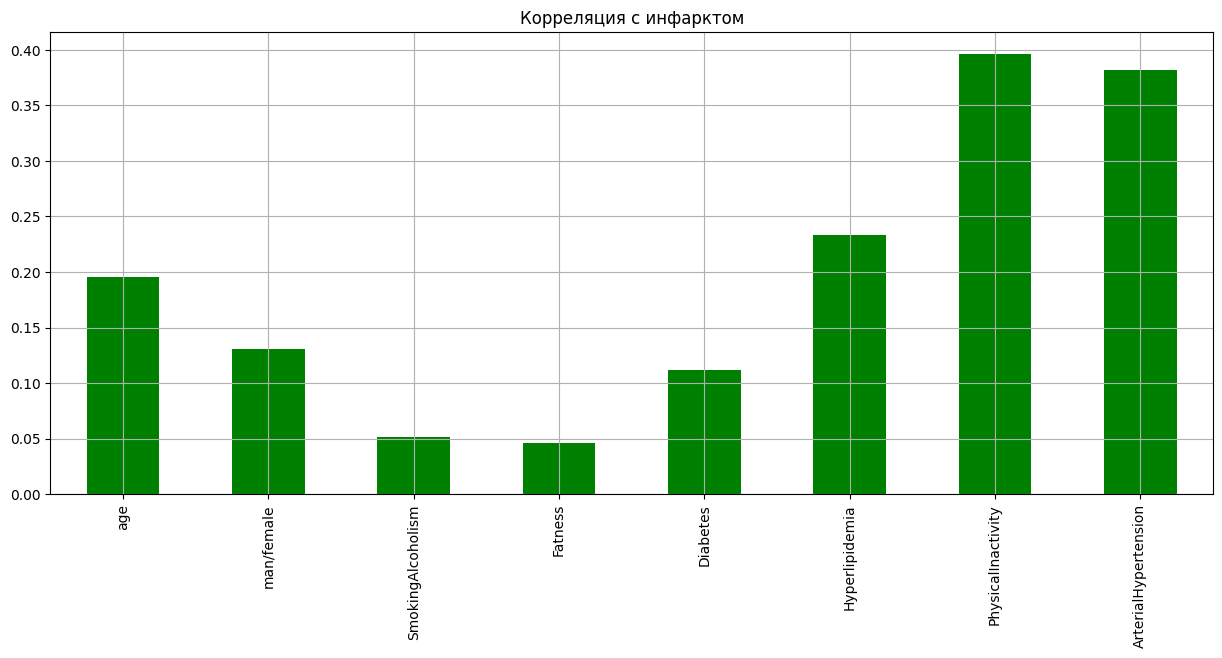

In [51]:
df.drop('minf', axis=1).corrwith(df.minf).plot(kind='bar', grid=True, figsize=(15, 6), title="Корреляция с инфарктом", color="green");

### Вывод по предобработке
В процессе предобработки данных датасет был проверен на дубликаты и пропуски, было проверено распределение датасета по возрасту, выявлены выбросы возраста, принятые за норму, исследована корреляция признаков по отношению к целевому признаку. Для балансировки данных использован метод upsampling data. Можно сделать вывод, что с увеличением возраста и уровня холестерина, при наличии артериального давления и диабета увеличивается риск инфаркта миокарда у маломобильных граждан.

## Обучение модели

### Деление данных на признаки и целевой признак

In [52]:
X = df.drop(['minf'], axis=1)
y = df['minf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=12345)

## Случайный лес

In [53]:
# Создаём модель леса с параметрами по умолчанию.
model = RandomForestClassifier()
# Обучаем на тренировочных данных
model.fit(X_train, y_train)

RandomForestClassifier()

### Результаты тренировки

In [54]:
y_pred = model.predict(X_train)
y_proba = model.predict_proba(X_train)
y_proba = y_proba[:, 1]

accuracy = f1_score(y_train, y_pred)

[[2424  349]
 [   0 2619]] 
 roc_auc_score 0.9772892536675108
 rec: 1.0
 prec: 0.8824123989218329
 accuracy: 0.9352744807121661
 f1: 0.9375335600501163



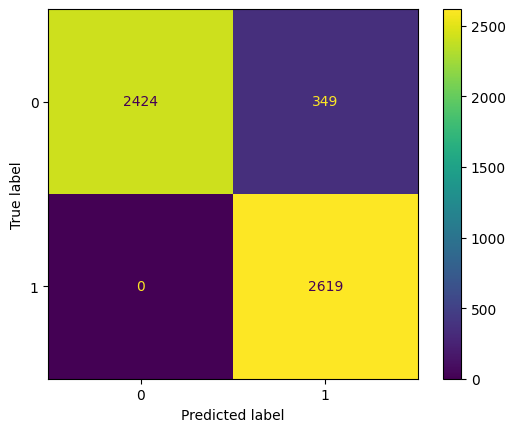

In [55]:
print(confusion_matrix(y_train, y_pred), '\n',
f'roc_auc_score {roc_auc_score(y_train, y_proba)}\n',
f'rec: {recall_score(y_train, y_pred)}\n',
f'prec: {precision_score(y_train, y_pred)}\n',
f'accuracy: {model.score(X_train, y_train)}\n',
f'f1: {f1_score(y_train, y_pred)}\n',)

predicted_train=model.predict(X_train)
cm = confusion_matrix(y_train, predicted_train, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()
plt.show()

Видим, что в целом модель обучилась неплохо.



Посмотрим, какие переменные более всего принимаются во внимание нашей моделью

In [56]:
# Извлекаем значимость параметров
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Выводим значения
fi.head()

,feature,importance
0,age,0.442727
6,PhysicalInactivity,0.159631
7,ArterialHypertension,0.110265
5,Hyperlipidemia,0.075178
4,Diabetes,0.063569


Значимость параметра показывает, какие переменные лучше всего разделяют набор данных на классы. В данном примере переменная age (возраст) является самым значимым параметром.

Попробуем улучшить модель, подобрав к ней гиперпараметры

In [57]:
from sklearn.model_selection import RandomizedSearchCV

# Подбор гиперпараметров
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# оценщик подбора гиперпараметров
estimator = RandomForestClassifier(random_state = 12345)

# Создание модели
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1,
                        scoring = 'roc_auc', cv = 3,
                        n_iter = 10, verbose = 1, random_state=12345)

# Fit
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=12345),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 12, 12, 12, 12, ...],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  13,  17,  21,  25,  29,  33,  37,  41,  44,  48,  52,  56,
        60,  64,  68,  72,  75,  79,  83,  87,  91,  95,  99, 103, 106,
       110, 114, 118, 122, 126, 130, 134, 137, 141, 145, 149, 153, 157,
       161, 165, 168, 172, 176, 180, 184, 188, 192, 196, 200])},
                   random_state=12345, scoring='roc_auc', verbose=1)

In [58]:
# Выводим лучшие гиперпараметры
rs.best_params_

{'n_estimators': 75,
 'min_samples_split': 10,
 'max_leaf_nodes': 34,
 'max_features': None,
 'max_depth': 15,
 'bootstrap': True}

In [75]:
# Создаём модель леса с лучшими гиперпараметрами
best_model = RandomForestClassifier(n_estimators = 75,
                                    min_samples_split = 10,
                                    max_leaf_nodes = 34,
                                    max_features = None,
                                    max_depth = 15,
                                    bootstrap = True)

# Обучаем на тренировочных данных
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features=None, max_leaf_nodes=34,
                       min_samples_split=10, n_estimators=75)

Мы можем видеть, что наилучшие значения гиперпараметров не являются значениями по умолчанию. Это показывает важность настройки модели для конкретного набора данных. Каждый набор данных будет иметь разные характеристики, и модель, которая лучше всего подходит для одного набора данных, не обязательно будет лучшей для всех наборов данных.

Используем лучшую модель

In [76]:
# Теперь мы можем взять лучшую модель (она уже была обучена) и оценить ее. Надеюсь, она будет работать лучше, чем обычный случайный лес.

y_pred = best_model.predict(X_train)
y_proba = best_model.predict_proba(X_train)[:, 1]

rf_predictions = best_model.predict(X_test)
rf_probs = best_model.predict_proba(X_test)[:, 1]

In [77]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

print(f'Среднее количество узлов {int(np.mean(n_nodes))}')
print(f'Средняя максимальная глубина {int(np.mean(max_depths))}')

Среднее количество узлов 67
Средняя максимальная глубина 11


Наилучшая максимальная глубина не является неограниченной, как мы видели выше. Это указывает на то, что ограничение максимальной глубины отдельных деревьев решений может повысить эффективность перекрестной проверки в случайном лесу.

### Результаты тренировки

In [78]:
y_pred = best_model.predict(X_train)
y_proba = best_model.predict_proba(X_train)
y_proba = y_proba[:, 1]

roc_auc_score 0.9437208631147981
 rec: 0.9347079037800687
 prec: 0.8357801297371117
 accuracy: 0.879080118694362
 f1: 0.882480173035328



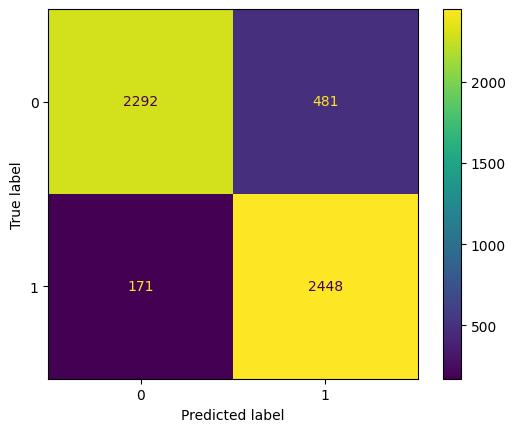

In [81]:
print(f'roc_auc_score {roc_auc_score(y_train, y_proba)}\n',
f'rec: {recall_score(y_train, y_pred)}\n',
f'prec: {precision_score(y_train, y_pred)}\n',
f'accuracy: {best_model.score(X_train, y_train)}\n',
f'f1: {f1_score(y_train, y_pred)}\n',)

predicted_train = best_model.predict(X_train)
cm = confusion_matrix(y_train, predicted_train, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()
plt.show()

### Оценка точности модели с лучшими гиперпараметрами на тестовой выборке с помощью метрик точности.

[[ 945  190]
 [  59 1117]] 
 roc_auc_score 0.9373171956007073
 rec: 0.9498299319727891
 prec: 0.854628921193573
 accuracy: 0.8922544353093899
 f1: 0.8997180829641562



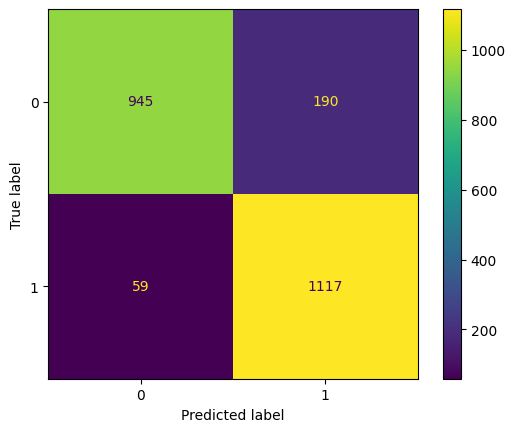

In [83]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)
y_proba = y_proba[:, 1]

print(confusion_matrix(y_test, y_pred), '\n',
f'roc_auc_score {roc_auc_score(y_test, y_proba)}\n',
f'rec: {recall_score(y_test, y_pred)}\n',
f'prec: {precision_score(y_test, y_pred)}\n',
f'accuracy: {best_model.score(X_test, y_test)}\n',
f'f1: {f1_score(y_test, y_pred)}\n',)

predicted_test = best_model.predict(X_test)
cm = confusion_matrix(y_test, predicted_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()
plt.show()

### Оценка точности модели с параметрами по умолчанию.

[[ 993  142]
 [   0 1176]] 
 roc_auc_score 0.9632514459528304
 rec: 1.0
 prec: 0.8922610015174507
 accuracy: 0.9385547382085677
 f1: 0.9430633520449078



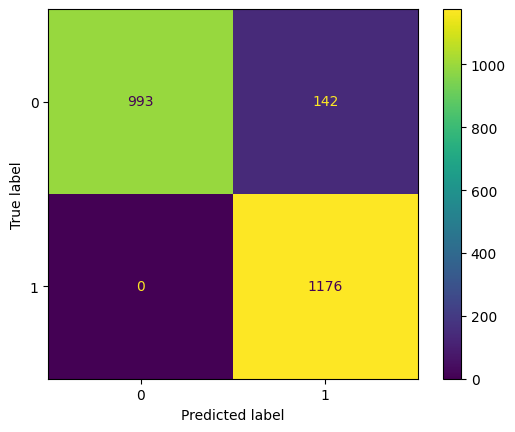

In [84]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)
y_proba = y_proba[:, 1]

print(confusion_matrix(y_test, y_pred), '\n',
f'roc_auc_score {roc_auc_score(y_test, y_proba)}\n',
f'rec: {recall_score(y_test, y_pred)}\n',
f'prec: {precision_score(y_test, y_pred)}\n',
f'accuracy: {model.score(X_test, y_test)}\n',
f'f1: {f1_score(y_test, y_pred)}\n',)

predicted_test = model.predict(X_test)
cm = confusion_matrix(y_test, predicted_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()
plt.show()

### Проверка модели, симулятор пациента

In [87]:
age=50
man=1
SmokingAlcoholism=1
Fatness=0
Diabetes=0
Hyperlipidemia=1
PhysicalInactivity=0
ArterialHypertension=1

test_vect = np.array([age, man, SmokingAlcoholism, Fatness, Diabetes,
       Hyperlipidemia, PhysicalInactivity, ArterialHypertension])
# так предсказывает модель с подобранными гиперпараметрами
print(f'Вероятное наличие диагноза (1-да, 0-нет): {best_model.predict(test_vect.reshape(1, -1))[0]}')
print(f'Вероятность инфаркта миокарда: {best_model.predict_proba(test_vect.reshape(1, -1))[0, 1]:.1%}')

Вероятное наличие диагноза (1-да, 0-нет): 1
Вероятность инфаркта миокарда: 89.8%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [89]:
# так предсказывает модель с параметрами по умолчанию
print(f'Вероятное наличие диагноза (1-да, 0-нет): {model.predict(test_vect.reshape(1, -1))[0]}')
print(f'Вероятность инфаркта миокарда: {model.predict_proba(test_vect.reshape(1, -1))[0, 1]:.1%}')

Вероятное наличие диагноза (1-да, 0-нет): 1
Вероятность инфаркта миокарда: 98.9%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Вывод

1. Модель случайного леса с параметрами по умолчанию показала лучшие результаты по сравнению с моделью с подобранными лучшими гиперпараметрами.

2. Для повышения точности модели необходимо создать больше объектов, провести нормализацию признаков, а также провести фильтрацию важных признаков.